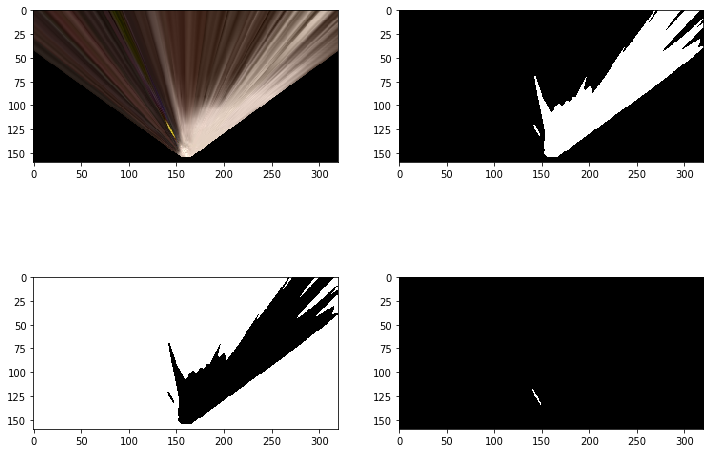

In [11]:
%matplotlib inline
#%matplotlib qt # Choose %matplotlib qt to plot to an interactive window (note it may show up behind your browser)
# Make some of the relevant imports
import cv2 # OpenCV for perspective transform
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc # For saving images as needed
import glob  # For reading in a list of images from a folder
import imageio
imageio.plugins.ffmpeg.download()
import PIL

path = '../test_dataset/IMG/*'
img_list = glob.glob(path)
# Grab a random image and display it
idx = np.random.randint(0, len(img_list)-1)



#example_grid = '../calibration_images/example_grid1.jpg'
#example_rock = '../calibration_images/example_rock1.jpg'

#grid_img_imread = mpimg.imread(example_grid)
#grid_img_cv2 = cv2.imread(example_grid)
#grid_otsu_img = cv2.imread(example_grid,0)

#rock_img_imread = mpimg.imread(example_rock)
#rock_img_cv2 = cv2.imread(example_rock) 
#rock_otsu_img = cv2.imread(example_rock,0)

def image_select(img):
    image_cv2 = cv2.imread(img)
    image_otsu = cv2.imread(img, 0)
    image_imread = mpimg.imread(img)
    return image_cv2, image_otsu, image_imread

image_cv2, image_otsu, image_imread = image_select(img_list[idx])

#WARPED PERSPECIVE TRANSFORM
def perspect_transform(img, src, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))# keep same size as input image
    return warped

dst_size = 5 
bottom_offset = 6
source = np.float32([[15, 140], [301 ,140],[200, 96], [118, 96]])
destination = np.float32([[image_imread.shape[1]/2 - dst_size, image_imread.shape[0] - bottom_offset],
                  [image_imread.shape[1]/2 + dst_size, image_imread.shape[0] - bottom_offset],
                  [image_imread.shape[1]/2 + dst_size, image_imread.shape[0] - 2*dst_size - bottom_offset], 
                  [image_imread.shape[1]/2 - dst_size, image_imread.shape[0] - 2*dst_size - bottom_offset],
                  ])
warped = perspect_transform(image_otsu, source, destination)
warped2 = perspect_transform(image_imread, source, destination)

#GROUND
def navigable_thresh(img):
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret2,threshed_ground = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return threshed_ground

navigable_world = navigable_thresh(warped)

#OBSTACLES
def obstacle_thresh(img):
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret2,threshed_obstacle = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return threshed_obstacle

obstacle_world = obstacle_thresh(warped)

#GOLD ROCKS
warped_rock = perspect_transform(image_cv2, source, destination)
def rock_thresh(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([4,100,100])
    upper_yellow = np.array([33,255,255])
    threshed_sample = cv2.inRange(hsv, lower_yellow, upper_yellow)
    return threshed_sample

warped_rock = perspect_transform(image_cv2, source, destination)
rock_world = rock_thresh(warped_rock)

fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(warped2)
plt.subplot(222)
plt.imshow(navigable_world, cmap='gray')
plt.subplot(223)
plt.imshow(obstacle_world, cmap='gray')
plt.subplot(224)
plt.imshow(rock_world, cmap='gray')


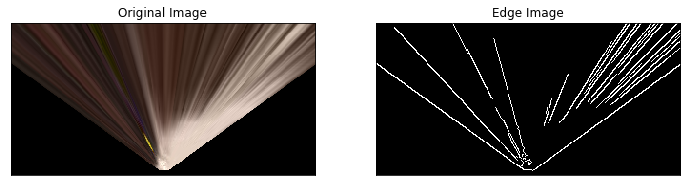

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = warped2
edges = cv2.Canny(img,100,200)

fig = plt.figure(figsize=(12,9))
plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    
plt.show()